In [385]:
import torch
import psutil
import gc

In [386]:
%uv pip show torch

Using Python 3.12.12 environment at: /home/test-14900/anaconda3/envs/conda-env-3-12
Name: torch
Version: 2.10.0
Location: /home/test-14900/anaconda3/envs/conda-env-3-12/lib/python3.12/site-packages
Requires: cuda-bindings, filelock, fsspec, jinja2, networkx, nvidia-cublas-cu12, nvidia-cuda-cupti-cu12, nvidia-cuda-nvrtc-cu12, nvidia-cuda-runtime-cu12, nvidia-cudnn-cu12, nvidia-cufft-cu12, nvidia-cufile-cu12, nvidia-curand-cu12, nvidia-cusolver-cu12, nvidia-cusparse-cu12, nvidia-cusparselt-cu12, nvidia-nccl-cu12, nvidia-nvjitlink-cu12, nvidia-nvshmem-cu12, nvidia-nvtx-cu12, setuptools, sympy, triton, typing-extensions
Required-by:
Note: you may need to restart the kernel to use updated packages.


In [387]:
display(torch.cuda.is_available())

False

### Introduction to tensors:
- Multidimentional array

In [388]:
# creating tensor
display(""""1. scaler tensor: tensor with 0 dimension""")

scaler=torch.tensor(42)
display(scaler)
display(scaler.ndim)
display(scaler.shape)

display("""2. vector tensor: tensor with 1 dimension""" )
vector=torch.tensor([1,2,3])
display(vector)
display(vector.ndim)
display(vector.shape)

display("""3. metrix tensor: tensor with 2 dimension""" )
matrix=torch.tensor([[1,2],[2,4],[5,6]])
display(matrix)
display(matrix.ndim)
display(matrix.shape)


display("""4. 3d tensor: tensor with dimension greater than 3""" )
d_tensor=torch.tensor([[[1,2],[2,4],[5,6]],[[7,8],[9,10],[11,12]]])
display(d_tensor)
display(d_tensor.ndim)
display(d_tensor.shape)

'"1. scaler tensor: tensor with 0 dimension'

tensor(42)

0

torch.Size([])

'2. vector tensor: tensor with 1 dimension'

tensor([1, 2, 3])

1

torch.Size([3])

'3. metrix tensor: tensor with 2 dimension'

tensor([[1, 2],
        [2, 4],
        [5, 6]])

2

torch.Size([3, 2])

'4. 3d tensor: tensor with dimension greater than 3'

tensor([[[ 1,  2],
         [ 2,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])

3

torch.Size([2, 3, 2])

### GPU acceleration

In [389]:
if torch.cuda.is_available():
    gpu_tensor=vector.to('cuda')
    display("Tensor on gpu",gpu_tensor)
else:
    print("CUDA(Compute Unified Device Architecture) is not available")


CUDA(Compute Unified Device Architecture) is not available


### Torch properties:

In [390]:
print("Data type of matrix: ",matrix.dtype)
print("Dimension of matrix: ",torch.tensor([1,2,3,4]).ndim)
print("Tensor exist on which device: ",torch.tensor([1,2,3,4]).device)
print("Is tensor on CUDA:",torch.tensor([1,2,3]).is_cuda)
print("Size of matrix",torch.tensor([1,2,3,4,5]))
print("No of elements in tensor",torch.tensor([1,2,3]).numel())

Data type of matrix:  torch.int64
Dimension of matrix:  1
Tensor exist on which device:  cpu
Is tensor on CUDA: False
Size of matrix tensor([1, 2, 3, 4, 5])
No of elements in tensor 3


### Acessing elements

In [391]:
print("Scaler tensor: ",scaler)
print("Vector tensor: ",vector)
print("Matrix tensor: ",matrix)
print("3d tensor: ",d_tensor)

Scaler tensor:  tensor(42)
Vector tensor:  tensor([1, 2, 3])
Matrix tensor:  tensor([[1, 2],
        [2, 4],
        [5, 6]])
3d tensor:  tensor([[[ 1,  2],
         [ 2,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])


In [392]:
print(matrix[0])
print(matrix[0,1])


tensor([1, 2])
tensor(2)


In [393]:
print(d_tensor[0,1,1])

tensor(4)


In [394]:
d_tensor[:,0]

tensor([[1, 2],
        [7, 8]])

In [395]:
d_tensor[0,:1]

tensor([[1, 2]])

### Splitting

In [396]:
matrix[:2,:1]

tensor([[1],
        [2]])

### Fancy indexing

In [397]:
new_matrix=torch.tensor([[10,20,30,40],[50,60,70,80]])

In [398]:
# show 40,80
selected_elements=new_matrix[[0,1],[3,3]] ### [[row,row],[col,col]]
print(selected_elements)


tensor([40, 80])


### Boolean indexing

In [399]:
greater_than_ten=new_matrix>10
print(greater_than_ten)

tensor([[False,  True,  True,  True],
        [ True,  True,  True,  True]])


In [400]:
print(new_matrix[greater_than_ten])

tensor([20, 30, 40, 50, 60, 70, 80])


### Changing tensor values using index

In [401]:
print(new_matrix)
new_matrix[0,0]=5
print(new_matrix)

tensor([[10, 20, 30, 40],
        [50, 60, 70, 80]])
tensor([[ 5, 20, 30, 40],
        [50, 60, 70, 80]])


### reverse row column

In [402]:
print(torch.flip(new_matrix,dims=[0,1])) # for row and column

tensor([[80, 70, 60, 50],
        [40, 30, 20,  5]])


In [403]:
new_matrix=torch.tensor([[10,20,30,40,50],[60,70,80,90,100],[110,120,130,140,150]])
print(torch.flip(new_matrix,dims=[-2,1])) # for row and column

tensor([[150, 140, 130, 120, 110],
        [100,  90,  80,  70,  60],
        [ 50,  40,  30,  20,  10]])


In [404]:
new_matrix=torch.tensor([[10,20,30,40,50,1],[60,70,80,90,100,2],[110,120,130,140,150,3],[1001,1002,1003,1004,1005,1006]])
print(torch.flip(new_matrix,dims=[0,1])) # for row and column

tensor([[1006, 1005, 1004, 1003, 1002, 1001],
        [   3,  150,  140,  130,  120,  110],
        [   2,  100,   90,   80,   70,   60],
        [   1,   50,   40,   30,   20,   10]])


In [405]:
new_matrix=torch.tensor([[10,20,30,40,50,1],[60,70,80,90,100,2],[110,120,130,140,150,3],[1001,1002,1003,1004,1005,1006]])
print(torch.flip(new_matrix,dims=[0])) # for row only

tensor([[1001, 1002, 1003, 1004, 1005, 1006],
        [ 110,  120,  130,  140,  150,    3],
        [  60,   70,   80,   90,  100,    2],
        [  10,   20,   30,   40,   50,    1]])


In [406]:
new_matrix=torch.tensor([[10,20,30,40,50,1],[60,70,80,90,100,2],[110,120,130,140,150,3],[1001,1002,1003,1004,1005,1006]])
print(torch.flip(new_matrix,dims=[1])) # for column only

tensor([[   1,   50,   40,   30,   20,   10],
        [   2,  100,   90,   80,   70,   60],
        [   3,  150,  140,  130,  120,  110],
        [1006, 1005, 1004, 1003, 1002, 1001]])


In [407]:
d_tensor

tensor([[[ 1,  2],
         [ 2,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])

In [408]:
print(torch.flip(d_tensor,dims=[0])) ### for row only

tensor([[[ 7,  8],
         [ 9, 10],
         [11, 12]],

        [[ 1,  2],
         [ 2,  4],
         [ 5,  6]]])


In [409]:
d_tensor

tensor([[[ 1,  2],
         [ 2,  4],
         [ 5,  6]],

        [[ 7,  8],
         [ 9, 10],
         [11, 12]]])

In [410]:

print(torch.flip(d_tensor,dims=[2])) ### for col only

tensor([[[ 2,  1],
         [ 4,  2],
         [ 6,  5]],

        [[ 8,  7],
         [10,  9],
         [12, 11]]])


In [411]:
print(torch.rot90(new_matrix,k=1,dims=[0,1]))

tensor([[   1,    2,    3, 1006],
        [  50,  100,  150, 1005],
        [  40,   90,  140, 1004],
        [  30,   80,  130, 1003],
        [  20,   70,  120, 1002],
        [  10,   60,  110, 1001]])


### Using random number to create noise image

In [412]:
random_tensor=torch.rand(5)

In [413]:
print(random_tensor)

tensor([0.2967, 0.8567, 0.6383, 0.6738, 0.5280])


In [414]:
print(random_tensor.ndim)

1


In [415]:
random_tensor=torch.rand(3,4,4) ### (size,row,col)


In [416]:
print(random_tensor)
print(random_tensor.ndim)

tensor([[[0.5637, 0.5880, 0.8797, 0.1872],
         [0.3114, 0.9246, 0.5305, 0.6173],
         [0.0531, 0.1713, 0.8219, 0.3867],
         [0.9148, 0.1501, 0.5000, 0.5066]],

        [[0.9199, 0.5609, 0.6509, 0.8557],
         [0.4514, 0.7159, 0.9450, 0.8592],
         [0.6785, 0.5639, 0.4845, 0.7386],
         [0.8470, 0.0759, 0.2633, 0.6450]],

        [[0.2858, 0.4847, 0.1587, 0.0924],
         [0.0176, 0.6050, 0.5078, 0.0497],
         [0.7349, 0.3982, 0.2617, 0.6142],
         [0.1195, 0.5215, 0.9849, 0.7733]]])
3


In [417]:
random_tensor=torch.rand(3,4,3) ### (size,row,col)

In [418]:
print(random_tensor)

tensor([[[0.4330, 0.2459, 0.0126],
         [0.3319, 0.3247, 0.0087],
         [0.0720, 0.5282, 0.7911],
         [0.0265, 0.5589, 0.3136]],

        [[0.4476, 0.6503, 0.7207],
         [0.1124, 0.8451, 0.7271],
         [0.9038, 0.9700, 0.1877],
         [0.9599, 0.1637, 0.0011]],

        [[0.5133, 0.2301, 0.5290],
         [0.1093, 0.4882, 0.4482],
         [0.2296, 0.9037, 0.1011],
         [0.9608, 0.2151, 0.8344]]])


In [419]:
torch.manual_seed(1) ### it maintain reproducibility
print(torch.rand(3,4,3))

tensor([[[0.7576, 0.2793, 0.4031],
         [0.7347, 0.0293, 0.7999],
         [0.3971, 0.7544, 0.5695],
         [0.4388, 0.6387, 0.5247]],

        [[0.6826, 0.3051, 0.4635],
         [0.4550, 0.5725, 0.4980],
         [0.9371, 0.6556, 0.3138],
         [0.1980, 0.4162, 0.2843]],

        [[0.3398, 0.5239, 0.7981],
         [0.7718, 0.0112, 0.8100],
         [0.6397, 0.9743, 0.8300],
         [0.0444, 0.0246, 0.2588]]])


In [420]:
torch.manual_seed(1)
print(torch.rand(3,4,3))

tensor([[[0.7576, 0.2793, 0.4031],
         [0.7347, 0.0293, 0.7999],
         [0.3971, 0.7544, 0.5695],
         [0.4388, 0.6387, 0.5247]],

        [[0.6826, 0.3051, 0.4635],
         [0.4550, 0.5725, 0.4980],
         [0.9371, 0.6556, 0.3138],
         [0.1980, 0.4162, 0.2843]],

        [[0.3398, 0.5239, 0.7981],
         [0.7718, 0.0112, 0.8100],
         [0.6397, 0.9743, 0.8300],
         [0.0444, 0.0246, 0.2588]]])


In [421]:
torch.manual_seed(42)
print(torch.rand(3,4,3))

tensor([[[0.8823, 0.9150, 0.3829],
         [0.9593, 0.3904, 0.6009],
         [0.2566, 0.7936, 0.9408],
         [0.1332, 0.9346, 0.5936]],

        [[0.8694, 0.5677, 0.7411],
         [0.4294, 0.8854, 0.5739],
         [0.2666, 0.6274, 0.2696],
         [0.4414, 0.2969, 0.8317]],

        [[0.1053, 0.2695, 0.3588],
         [0.1994, 0.5472, 0.0062],
         [0.9516, 0.0753, 0.8860],
         [0.5832, 0.3376, 0.8090]]])


In [422]:
torch.manual_seed(1)
print(torch.rand(3,4,1))

tensor([[[0.7576],
         [0.2793],
         [0.4031],
         [0.7347]],

        [[0.0293],
         [0.7999],
         [0.3971],
         [0.7544]],

        [[0.5695],
         [0.4388],
         [0.6387],
         [0.5247]]])


### Generate random integer

In [423]:
torch.manual_seed(1)
print(torch.randint(1,100,(2,2))) ### params =(low,high,(row,column))

tensor([[23, 15],
        [28, 78]])


In [424]:
torch.manual_seed(1)
print(torch.randint(1,100,(2,5)))

tensor([[23, 15, 28, 78, 26],
        [ 2, 39, 24, 45,  1]])


### Generate random numbers from normal distribution

In [425]:
torch.manual_seed(1)
print(torch.normal(0.5,1,(5,2))) ### params=(mean,std,(row,column))

tensor([[ 1.1614,  0.7669],
        [ 0.5617,  1.1213],
        [ 0.0481,  0.3339],
        [-1.0228,  0.8817],
        [-0.5276, -0.0631]])


In [426]:
torch.manual_seed(1)
print(torch.normal(1,1,(5,2))) ### params=(mean,std,(row,column))

tensor([[ 1.6614,  1.2669],
        [ 1.0617,  1.6213],
        [ 0.5481,  0.8339],
        [-0.5228,  1.3817],
        [-0.0276,  0.4369]])


### Creating noise image using pytorch

In [427]:
import matplotlib.pyplot as plt

In [428]:
uniform_noise=torch.rand((256,256)) ### params=(height,width)

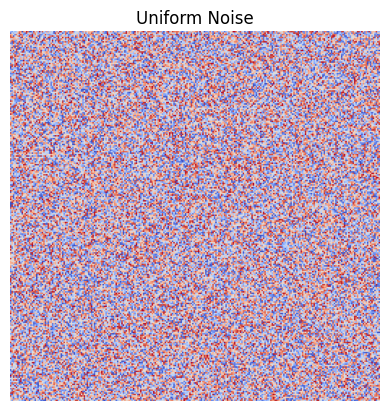

In [429]:
plt.imshow(uniform_noise.numpy(),cmap="coolwarm")
plt.title("Uniform Noise")
plt.axis("off")
plt.show()

### Creating RGB noise image

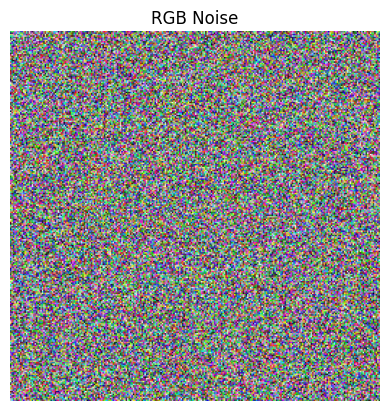

In [430]:
rgb_noise=torch.rand((256,256,3))
plt.imshow(rgb_noise.numpy(),cmap="coolwarm")
plt.title("RGB Noise")
plt.axis("off")
plt.show()

In [431]:
print("Shape",rgb_noise.shape)

Shape torch.Size([256, 256, 3])


In [432]:
print("Data type",rgb_noise.dtype)

Data type torch.float32


In [433]:
print("Min value of rgb noise",torch.min(rgb_noise))

Min value of rgb noise tensor(1.6510e-05)


In [434]:
print("Max value of rgb noise",torch.max(rgb_noise))

Max value of rgb noise tensor(1.0000)


### zero's and one's

In [435]:
print(torch.zeros((5,5)))

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [436]:
print(torch.ones((4,4)))

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


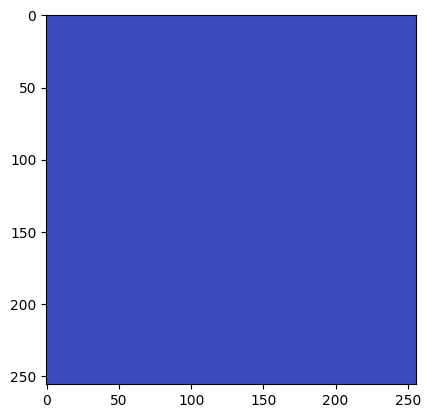

In [437]:
plt.imshow(torch.zeros((256,256)).numpy(),cmap="coolwarm",vmin=0,vmax=1)

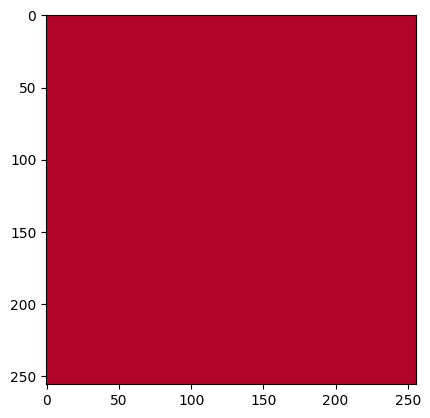

In [438]:
plt.imshow(torch.ones((256,256)).numpy(),cmap="coolwarm",vmin=0,vmax=1)

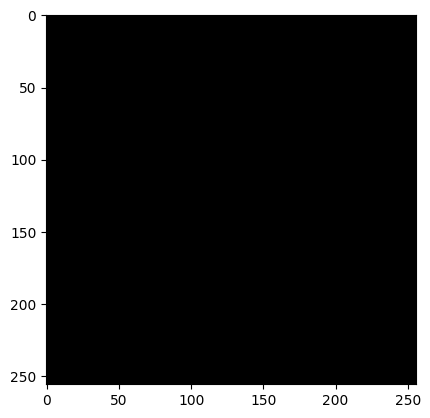

In [439]:
plt.imshow(torch.zeros((256,256)).numpy(),cmap="grey",vmin=0,vmax=1)

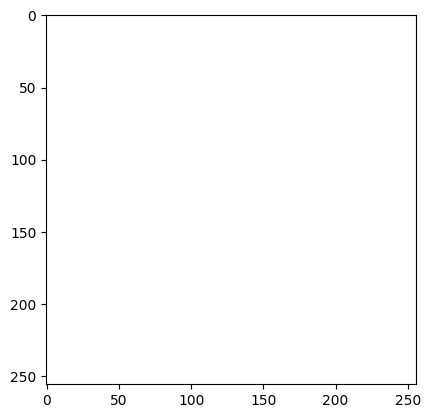

In [440]:
plt.imshow(torch.ones((256,256)).numpy(),cmap="grey",vmin=0,vmax=1)

### Data types for tensors
1. Float -> for most dl task -> float 32, float 64, float 16
2. Integer -> for categorical data and indices -> int 8, int 64, int 32
3. Boolean -> for creating mask or logical operation
4. Complex number -> advanced computation -> complex 64, complex 128

In [441]:
default_tensor=torch.tensor([1.5,2.5,3.5])
print(default_tensor.dtype)
print(default_tensor)

torch.float32
tensor([1.5000, 2.5000, 3.5000])


In [442]:
float64_tensor=torch.tensor([1.5,2.5,3.5],dtype=torch.float64)
print(float64_tensor.dtype)
print(float64_tensor)

torch.float64
tensor([1.5000, 2.5000, 3.5000], dtype=torch.float64)


In [443]:
float16_tensor=torch.tensor([1.5,2.5,3.5],dtype=torch.float16)
print(float16_tensor.dtype)
print(float16_tensor)

torch.float16
tensor([1.5000, 2.5000, 3.5000], dtype=torch.float16)


In [444]:
boolean_tensor=torch.tensor([True,False,False],dtype=torch.bool)
print(boolean_tensor.dtype)
print(boolean_tensor)

torch.bool
tensor([ True, False, False])


### Conversion of data type

In [445]:
##### int to float 
int_tensor=torch.tensor([1,2,3,4,5,0])
print(int_tensor.dtype)
conversion_of_new_tensor=int_tensor.to(torch.float64)
print(conversion_of_new_tensor)
print(conversion_of_new_tensor.dtype)

torch.int64
tensor([1., 2., 3., 4., 5., 0.], dtype=torch.float64)
torch.float64


In [446]:
##### int to bool
print(int_tensor.to(torch.bool)) 

tensor([ True,  True,  True,  True,  True, False])


In [447]:
##### float to int
print(torch.tensor([1.5,1.65,2.89,3.60,4.60]).to(torch.int64))

tensor([1, 1, 2, 3, 4])


In [448]:
##### float to boolean
print(torch.tensor([0,0.23,1.5,2.5,1.3,3.89,5.0]).to(torch.bool))

tensor([False,  True,  True,  True,  True,  True,  True])


In [449]:
##### boolean to int
print(torch.tensor([True,False,True,False]).to(torch.int16))

tensor([1, 0, 1, 0], dtype=torch.int16)


In [450]:
##### boolean to float
print(torch.tensor([True,False,True,False]).to(torch.float))

tensor([1., 0., 1., 0.])


### Impact of data type on memory
- torch.ones(256).element_size() -> gives the size of one elements in bytes
- .nelement() -> number of element in tensor 

In [451]:
print("Available virtual memory: ",psutil.virtual_memory().available/1024**3)

Available virtual memory:  57.64222717285156


In [452]:
if psutil.virtual_memory().available/1024**3>56:
    float32_tensor=torch.ones((1024,1024),dtype=torch.float32)
    float64_tensor=torch.ones((809120,10240),dtype=torch.float64)

    print((float32_tensor.element_size()*float32_tensor.nelement())," bytes")
    print((float64_tensor.element_size()*float64_tensor.nelement())," bytes")
    print((float32_tensor.element_size()*float32_tensor.nelement())/1e9," Gb")
    print((float64_tensor.element_size()*float64_tensor.nelement())/1e9," Gb")
    del float32_tensor 
    del float64_tensor 
    gc.collect() ### clear memory forcefully
else:
    print("Memory not available.")



4194304  bytes
66283110400  bytes
0.004194304  Gb
66.2831104  Gb


### Tensor manipulation
- reshaping
- joining
- transposing
- splitting
- permuting dimension

In [453]:
by_arange=torch.arange(0,12,2,dtype=torch.float16)

In [454]:
print(by_arange.ndim)
print(by_arange.nelement())
print(by_arange.shape)

1
6
torch.Size([6])


In [455]:
reshaped_tensor=torch.reshape(by_arange,[2,3])

In [456]:
print(by_arange)
print(reshaped_tensor)

tensor([ 0.,  2.,  4.,  6.,  8., 10.], dtype=torch.float16)
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]], dtype=torch.float16)


In [457]:
# view
flattened_tensor=reshaped_tensor.view(-1)

In [458]:
print(flattened_tensor)

tensor([ 0.,  2.,  4.,  6.,  8., 10.], dtype=torch.float16)


In [459]:
print(flattened_tensor.is_contiguous())

True


In [460]:
transpose_tensor=reshaped_tensor.transpose(1,1)
print(transpose_tensor)
print(transpose_tensor.is_contiguous())

tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]], dtype=torch.float16)
True


In [461]:
# stack -> created a new dimension based on the tensor's rank
slicing_tensor_1=torch.tensor([torch.arange(0,10,2).tolist(),torch.arange(10,20,2).tolist()])
t1=torch.arange(20,30,2)
t2=torch.arange(30,40,2)
slicing_tensor_2=torch.stack([t1,t2])


In [462]:
print(slicing_tensor_1)
print(slicing_tensor_2)

tensor([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18]])
tensor([[20, 22, 24, 26, 28],
        [30, 32, 34, 36, 38]])


In [463]:
slice_tensor=torch.stack([slicing_tensor_1,slicing_tensor_2]) 
print(slice_tensor)

tensor([[[ 0,  2,  4,  6,  8],
         [10, 12, 14, 16, 18]],

        [[20, 22, 24, 26, 28],
         [30, 32, 34, 36, 38]]])


In [464]:
print(slice_tensor.ndim)

3


In [465]:
print(slice_tensor[:,:,1])

tensor([[ 2, 12],
        [22, 32]])


In [466]:
print(slice_tensor[:,:,:4])

tensor([[[ 0,  2,  4,  6],
         [10, 12, 14, 16]],

        [[20, 22, 24, 26],
         [30, 32, 34, 36]]])


In [467]:
print(slice_tensor.shape)

torch.Size([2, 2, 5])


In [468]:
### Joining tensor
### torch.cat() --> merges tensor along an existing dimension
joining_tensor_1=torch.cat((slicing_tensor_1,slicing_tensor_2),dim=0) # dim=0, means row wise

In [469]:
print(joining_tensor_1)

tensor([[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18],
        [20, 22, 24, 26, 28],
        [30, 32, 34, 36, 38]])


In [470]:
joining_tensor_2=torch.cat((slicing_tensor_1,slicing_tensor_2),dim=1) #dim=1, means col wise

In [471]:
print(joining_tensor_2)

tensor([[ 0,  2,  4,  6,  8, 20, 22, 24, 26, 28],
        [10, 12, 14, 16, 18, 30, 32, 34, 36, 38]])


In [473]:
### splitting
chunks=torch.chunk(joining_tensor_2,chunks=3)
print(chunks)

(tensor([[ 0,  2,  4,  6,  8, 20, 22, 24, 26, 28]]), tensor([[10, 12, 14, 16, 18, 30, 32, 34, 36, 38]]))


In [476]:
tmp=torch.arange(0,20,2)
chunks=torch.chunk(tmp,chunks=2,dim=0)
print(chunks)
for chunk in chunks:
    print(chunk)

(tensor([0, 2, 4, 6, 8]), tensor([10, 12, 14, 16, 18]))
tensor([0, 2, 4, 6, 8])
tensor([10, 12, 14, 16, 18])


In [477]:
chunks=torch.chunk(tmp,chunks=10,dim=0)
print(chunks)
for chunk in chunks:
    print(chunk)

(tensor([0]), tensor([2]), tensor([4]), tensor([6]), tensor([8]), tensor([10]), tensor([12]), tensor([14]), tensor([16]), tensor([18]))
tensor([0])
tensor([2])
tensor([4])
tensor([6])
tensor([8])
tensor([10])
tensor([12])
tensor([14])
tensor([16])
tensor([18])


In [479]:
### transpose -> if dimension m*n, then n*m
### permute -> rearranges all dimension in the specific order
original_tensor=torch.arange(0,10).reshape((2,5))
print(original_tensor)
transpose_tensor=original_tensor.transpose(0,1)
print(transpose_tensor)
print(transpose_tensor.is_contiguous())

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])
False


In [ ]:
p
permute_tensor=original_tensor.permute()

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 2 is not equal to len(dims) = 3